In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import cmocean

In [38]:
from tqdm import tqdm

In [68]:
from glob import glob
data = xr.open_mfdataset(sorted(glob('mur-data/*.nc')))
data = data.sel(lon=slice(-70,-50), lat=slice(34.5,42.5))['analysed_sst'].compute()
# data = data - data.mean(['lon','lat'])
data = (data - data.min(['lon','lat'])) / (data.max(['lon','lat']) - data.min(['lon','lat']))

In [70]:
def plot_slice(i, save=False):
    fig = plt.figure(figsize = (7,5))                                       
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                               central_latitude=40)) # Use map background
    ax.set_extent([290,310,34.5,42.5], crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=.6) 
    ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 11}
    gl.ylabel_style = {'size': 11}
#     cp = ax.contourf(data.lon, data.lat, data.isel(time=i), transform=ccrs.PlateCarree(), cmap='cmo.thermal',
#                     levels=np.arange(-7,7,1), extend='both')
    cp = ax.contourf(data.lon, data.lat, data.isel(time=i), transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                    levels=np.arange(0,1.05,.05), extend='both')             
    cb = fig.colorbar(cp,  orientation='horizontal', fraction=.05, pad=.04)
    if save:
        fig.savefig(f'{i:03d}.png')
        plt.close(fig)
    else:
        plt.show()

36.25 latitude
add more data - 2 more years

0it [00:00, ?it/s]

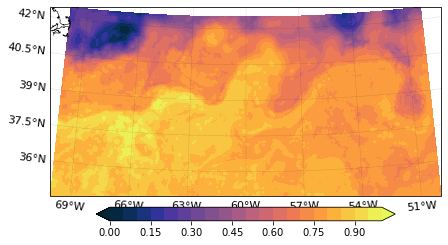

0it [00:02, ?it/s]


In [73]:
for i, t in tqdm(enumerate(data.time)):
    plot_slice(-1, save=False)
    break

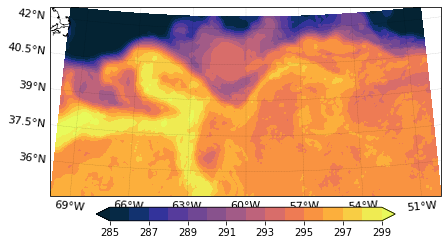

In [32]:
fig = plt.figure(figsize = (7,5))                                       
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                           central_latitude=40)) # Use map background
ax.set_extent([290,310,34.5,42.5], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=.6) 
ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}
cp = ax.contourf(data.lon, data.lat, data.isel(time=0), transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                levels=np.arange(285,300,1), extend='both')
cb = fig.colorbar(cp,  orientation='horizontal', fraction=.05, pad=.04)
plt.show()

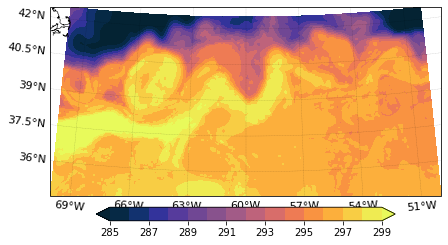

In [33]:
fig = plt.figure(figsize = (7,5))                                       
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                           central_latitude=40)) # Use map background
ax.set_extent([290,310,34.5,42.5], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=.6) 
ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}
cp = ax.contourf(data.lon, data.lat, data.isel(time=1), transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                levels=np.arange(285,300,1), extend='both')
cb = fig.colorbar(cp,  orientation='horizontal', fraction=.05, pad=.04)
plt.show()